<a href="https://colab.research.google.com/github/AuFeld/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/module3-Intro-to-Keras/CG_DS_423_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
# import
! pip install --upgrade tensorflow

In [0]:
! pip show tensorflow

In [0]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

In [0]:
# import data from keras

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [39]:
# use sklearn to understand data

from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
# normalize data

from sklearn.preprocessing import Normalizer

norm = Normalizer()

X_train_n = norm.fit_transform(X_train)

X_test_n = norm.fit_transform(X_test)

In [41]:
# create model architecture

model = Sequential(name='BaslineNN')

model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

model.summary()

Model: "BaslineNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_12 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_13 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_14 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 14        
Total params: 742
Trainable params: 742
Non-trainable params: 0
_________________________________________________________________


In [0]:
# fit model on train data

history = model.fit(X_train, y_train, epochs=250, validation_split=0.10, 
                    verbose=False)

In [43]:
# final metrics from model

print('\n MSE: $', model.evaluate(X_train_n, y_train)[0]*100)

404/404 [==============================] - 0s 50us/sample - loss: 565.0613 - mse: 565.0613

 MSE: $ 56506.133066309565


In [44]:
# metrics on test data

print("\n MSE: $", model.evaluate(X_test_n, y_test)[0]*100)

102/102 [==============================] - 0s 94us/sample - loss: 594.0860 - mse: 594.0860

 MSE: $ 59408.59913545496


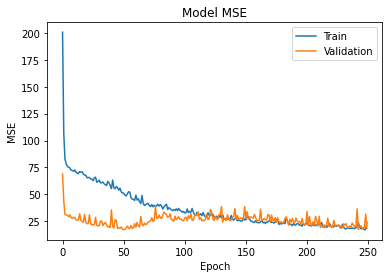

In [46]:
# visualize model by mse

import matplotlib.pyplot as plt

# plot training and validation MSE values

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

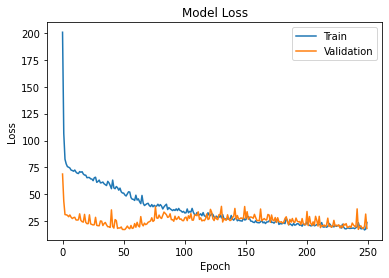

In [47]:
# visualize model by loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [48]:
# try liner regression model

from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(
                                n_estimators = 200, 
                                min_samples_leaf=10, 
                                max_depth=10
)

# fit model

reg.fit(X_train_n, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
# retreive MAE for test and train data

from sklearn.metrics import mean_squared_error

y_pred_train = reg.predict(X_train_n)
mse = 1000 * (mean_squared_error(y_train, y_pred_train))
print(f'Train MSE: ${mse}')

y_pred_test = reg.predict(X_test_n)
mse = 1000 * (mean_squared_error(y_test, y_pred_test))
print(f'Test MSE: ${mse}')

Train MSE: $47.33344303883059
Test MSE: $14961.456214094196


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
# import the goods

from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
import numpy as np
import tensorflow as tf

In [0]:
# load data

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
# set hyper parameter variables

batch_size = 64
num_classes = 10
epochs = 100

In [0]:
# reshape the data

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [0]:
# change data type to float

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
# alter y to correct encoding for output

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [79]:
mnist_model = Sequential(name='BaselineMnist')

# input ~> hidden
mnist_model.add(Dense(16, input_dim=784, activation='relu'))

# hidden

mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(LeakyReLU(alpha=0.05))
mnist_model.add(Dense(16, activation='relu'))

# output

mnist_model.add(Dense(num_classes, activation ='softmax'))

# compile

mnist_model.compile(loss='categorical_crossentropy', 
                    optimizer='adam', 
                    metrics=['acc',
                             'categorical_accuracy', 
                             'cosine_proximity'])

mnist_model.summary()

Model: "BaselineMnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_32 (Dense)             (None, 16)                272       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_34 (Dense)             (None, 10)                170       
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


In [80]:
# fit model on train data

history = mnist_model.fit(X_train, 
                          y_train, 
                          batch_size=batch_size, 
                          epochs=epochs, 
                          validation_split=0.10, 
                          verbose=False)

scores = mnist_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.5165 - acc: 0.8284 - categorical_accuracy: 0.8284 - cosine_proximity: 0.8564


In [90]:
# print scores

val_acc = max(history.history['val_acc'])
print(f'Best Validation Accuracy: {val_acc:.2%}')
print(f'Test Accuracy: {scores[1]:.2%}')

Best Validation Accuracy: 84.45%
Test Accuracy: 82.84%


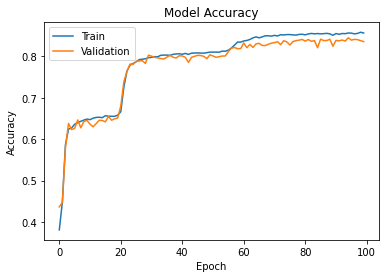

In [93]:
# visualize accuracies

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()



## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.